In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("wildfires_training.csv")

In [3]:
df

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...,...
149,yes,2017,31,67,0.0,45.15,17.89,26,9,15
150,no,2017,29,89,4.4,8.74,6.52,27,9,15
151,no,2009,27,88,0.5,8.87,3.71,28,9,30
152,no,2016,25,56,0.1,15.54,6.10,29,9,20


In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
is_fire = ['no', 'yes']

In [6]:
enc = OrdinalEncoder(categories=[is_fire])

In [7]:
df['fire'] = enc.fit_transform(df[['fire']])

In [8]:
df

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,0.0,2015,28,59,0.0,8.06,3.47,1,6,19
1,0.0,2010,30,61,1.3,8.17,4.03,2,6,13
2,0.0,2009,26,83,13.1,8.08,3.59,3,6,22
3,0.0,2017,25,87,2.5,7.18,2.42,4,6,15
4,0.0,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...,...
149,1.0,2017,31,67,0.0,45.15,17.89,26,9,15
150,0.0,2017,29,89,4.4,8.74,6.52,27,9,15
151,0.0,2009,27,88,0.5,8.87,3.71,28,9,30
152,0.0,2016,25,56,0.1,15.54,6.10,29,9,20


year            -0.060664
day              0.149659
month            0.163693
temp             0.563593
humidity        -0.525488
rainfall        -0.377136
drought_code     0.575877
buildup_index    0.625208
wind_speed      -0.118536
Name: fire, dtype: float64


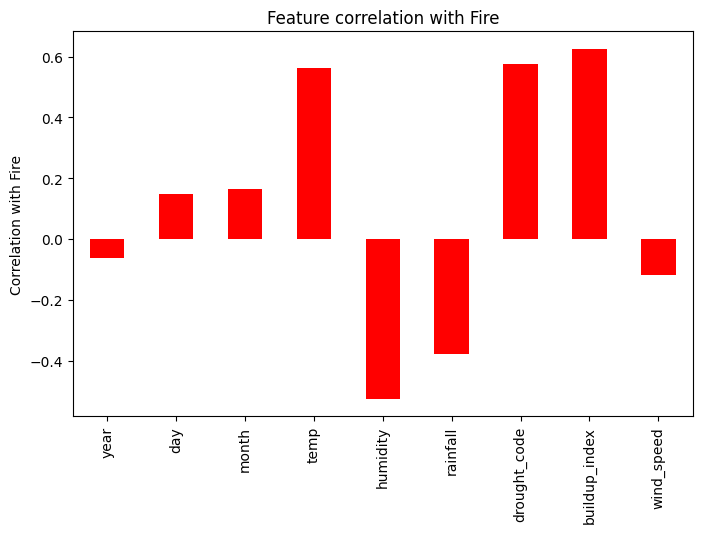

In [9]:
import matplotlib.pyplot as plt
features = ['year', 'day', 'month', 'temp','humidity','rainfall','drought_code','buildup_index','wind_speed']
target = 'fire'

correlations = df[features + [target]].corr()[target].drop(target)

print(correlations)
correlations.plot(kind='bar', figsize=(8,5), color='red')
plt.ylabel('Correlation with Fire')
plt.title('Feature correlation with Fire')
plt.show()

In [10]:
df = df.drop(columns=['year','day','wind_speed', 'month'])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('fire', axis=1)

In [13]:
y = df['fire']

In [14]:
X_train, X_validate, y_train, y_validate = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression(
    C = 1.0,
    penalty = 'l2',
    solver = 'lbfgs',
    max_iter= 1000
)

In [17]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
y_pred = model.predict(X_validate)

In [20]:
print("Accuracy:", accuracy_score(y_validate, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_validate, y_pred))
print("\nClassification Report:\n", classification_report(y_validate, y_pred))

Accuracy: 0.9032258064516129

Confusion Matrix:
 [[17  0]
 [ 3 11]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        17
         1.0       1.00      0.79      0.88        14

    accuracy                           0.90        31
   macro avg       0.93      0.89      0.90        31
weighted avg       0.92      0.90      0.90        31

